In [2]:

import pandas  as pd

In [7]:
dataset=pd.read_csv("C:/Users/Administrateur/Documents/GI2_S4/maching_learning/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
import numpy as np



(unique, counts) = np.unique(dataset['Outcome'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Unique values of the target variable [0 1]
Counts of the target variable : [500 268]


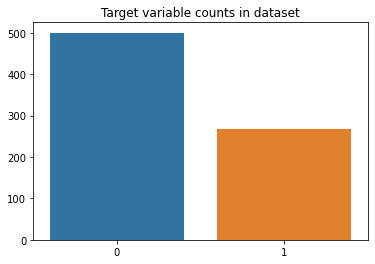

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=unique, y=counts)
plt.title('Target variable counts in dataset')
plt.show()

In [25]:
# Step 1: Define explonatory variables and target variable

X =dataset.loc[:, df.columns != 'Outcome'].values
y = dataset['Outcome']


In [28]:
# Step 2:  Apply normalization operation for numerical stability

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [33]:
# Step 3: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [30]:
# Step 4: Fit a Logistic Regression Model to the train data

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Step 5: Make predictions on the testing data

y_pred = log_reg.predict(X_test)

y_proba = log_reg.predict_proba(X_test)



In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8020833333333334

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[118  12]
 [ 26  36]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

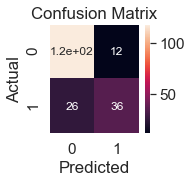

In [38]:
import pandas as pd

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (2,2))
sns.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size

In [40]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  36
False Positive(FP) =  12
True Negative(TN)  =  118
False Negative(FN) =  26


In [41]:
accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy  = {:0.3f}'.format(accuracy))

Accuracy  = 0.802


In [42]:
precision=TP/(TP+FP)

print('Precision = {:0.3f}'.format(precision))

Precision = 0.750


In [44]:
recall=TP/(TP+FN)
print('recall = {:0.3f}'.format(recall))


recall = 0.581


In [45]:
F1_measure= (2*precision*recall)/(precision+recall)

print('F1_measure = {:0.3f}'.format(F1_measure))

F1_measure = 0.655


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print('Recall = {:0.3f}'.format(recall_score(y_test, y_pred)))
print('Precision_measure = {:0.3f}'.format(precision_score(y_test, y_pred)))
print('F1_measure = {:0.3f}'.format(f1_score(y_test, y_pred)))

Recall = 0.581
Precision_measure = 0.750
F1_measure = 0.655


In [47]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [48]:
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.802083,0.580645,0.750000
Support Vector Machines,0.796875,0.580645,0.734694
Decision Trees,0.729167,0.645161,0.571429
Random Forest,0.796875,0.580645,0.734694
Naive Bayes,0.765625,0.532258,0.673469
K-Nearest Neighbor,0.807292,0.645161,0.727273


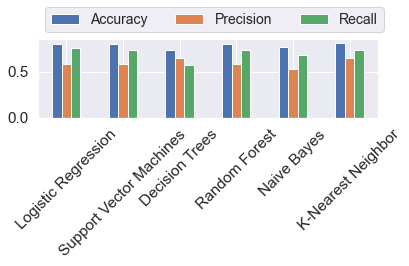

In [53]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()